# Pre-Processing & Data Training

The next step of this project is to pre-process and train the dataset. In order to do so it is important to see the data types of the data I am working it and see which ones are discrete (boolean), categorical, or numerical (scaler). Additionally it is imporant to see the distribution of the numerical columns to see if they are normally distributed or are skewed to the right ot left. If they are skewed either way, that they need to be normalized.

# The Data & Cleanup

To start off it is important to important to upload the dataset, clean it and see the data type of the columns in the dataset. For the most part this dataset has numerical columns but also has a couple of ctaegorical and boolean columns. The main dependent variable in this dataset, the Default column, is boolean as it has either a value of 1 (if borrower defaulted) or 0 ( if the borrower didn't default). 

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.model_selection

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
df = pd.read_csv('credit risk.csv')

In [42]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [43]:
df = df.rename(index=str, columns={"person_age":"Age", "person_income":"Income", "person_home_ownership":"home ownership", "person_emp_length":"Years_Employed","loan_intent":"intent","loan_amnt":"Amount","loan_int_rate":"Rate","loan_status":"Default","loan_percent_income":"Loan_Percent_Income","cb_person_default_on_file":"default on file","cb_person_cred_hist_length":"Credit_History","loan_grade":"grade"})

In [44]:
df.head()

,Age,Income,home ownership,Years_Employed,intent,grade,Amount,Rate,Default,Loan_Percent_Income,default on file,Credit_History
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [45]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

In [46]:
df.isnull().values.any()

True

In [47]:
df.dtypes

Age                      int64
Income                   int64
home ownership          object
Years_Employed         float64
intent                  object
grade                   object
Amount                   int64
Rate                   float64
Default                  int64
Loan_Percent_Income    float64
default on file         object
Credit_History           int64
dtype: object

Unsurprisingly the Age, Income, Years employed, Amount, Rate, Loan(% Income), and credit history are all numeric. While home ownership, grade, intent, and default on file are objects with home ownership, intent, and grade being categorical variables, and default on file being boolean.

In [48]:
df = df.dropna()

In [49]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

# Creating Dummy Variables

By Looking at the data types of the columns in this dataset there are four columns that aren't numerical. They are intent, home ownership, grade, and default of file. These are the columns for which dummy variables will need to be created. Before doing that it important to see the value counts for these columns.

In [50]:
print(df['grade'].value_counts())

A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: grade, dtype: int64


In [51]:
print(df['intent'].value_counts())

EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: intent, dtype: int64


In [52]:
print(df['home ownership'].value_counts())

RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: home ownership, dtype: int64


In [53]:
print(df['default on file'].value_counts())

N    23535
Y     5103
Name: default on file, dtype: int64


In [54]:
Features = ['grade', 'intent', 'home ownership', 'default on file']
df_features = df[Features]

In [55]:
dummy = pd.get_dummies(df_features, drop_first=True)

In [56]:
dummy.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home ownership_OTHER,home ownership_OWN,home ownership_RENT,default on file_Y
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1


In [57]:
df = pd.concat([df, dummy], axis=1)

In [58]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income  ... grade_G  \
0       35000  16.02

# Data Distribution

The next step is to see how the nuemrical data is distributed and see if what if any kind of scalling is necessary for pre-processing.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

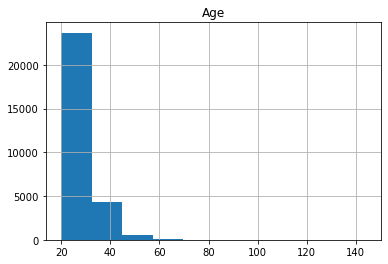

In [59]:
df.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

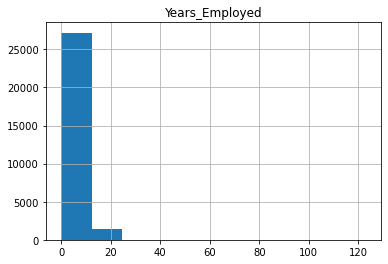

In [60]:
df.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

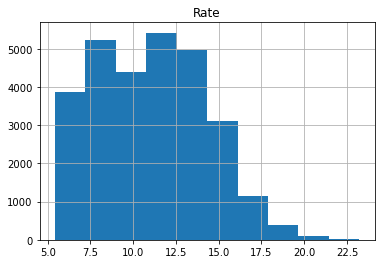

In [61]:
df.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

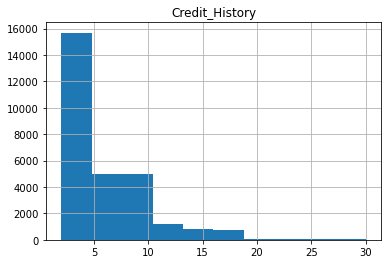

In [62]:
df.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

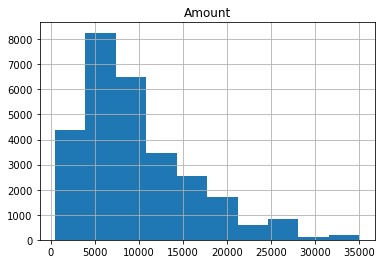

In [63]:
df.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

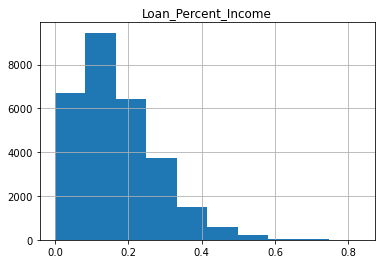

In [64]:
df.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

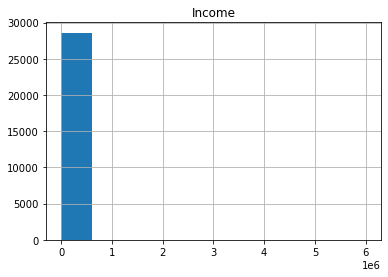

In [65]:
df.hist(column = 'Income')

A quick look at the numerical columns and it can be seen that they are skewed to the left.

In [66]:
df.describe()

,Age,Income,Years_Employed,Amount,Rate,Default,Loan_Percent_Income,Credit_History,grade_B,grade_C,...,grade_G,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home ownership_OTHER,home ownership_OWN,home ownership_RENT,default on file_Y
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,...,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736,0.319540,0.199001,...,0.002060,0.199176,0.111670,0.184824,0.170298,0.174628,0.003282,0.076542,0.508101,0.178190
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483,0.466307,0.399256,...,0.045343,0.399388,0.314965,0.388162,0.375901,0.379655,0.057199,0.265867,0.499943,0.382679
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train/Split Data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Default'), 
                                                    df.Default, test_size=0.2, 
                                                    random_state=50)

In [68]:
X_train.dtypes


Age                         int64
Income                      int64
home ownership             object
Years_Employed            float64
intent                     object
grade                      object
Amount                      int64
Rate                      float64
Loan_Percent_Income       float64
default on file            object
Credit_History              int64
grade_B                     uint8
grade_C                     uint8
grade_D                     uint8
grade_E                     uint8
grade_F                     uint8
grade_G                     uint8
intent_EDUCATION            uint8
intent_HOMEIMPROVEMENT      uint8
intent_MEDICAL              uint8
intent_PERSONAL             uint8
intent_VENTURE              uint8
home ownership_OTHER        uint8
home ownership_OWN          uint8
home ownership_RENT         uint8
default on file_Y           uint8
dtype: object

In [69]:
X_test.dtypes

Age                         int64
Income                      int64
home ownership             object
Years_Employed            float64
intent                     object
grade                      object
Amount                      int64
Rate                      float64
Loan_Percent_Income       float64
default on file            object
Credit_History              int64
grade_B                     uint8
grade_C                     uint8
grade_D                     uint8
grade_E                     uint8
grade_F                     uint8
grade_G                     uint8
intent_EDUCATION            uint8
intent_HOMEIMPROVEMENT      uint8
intent_MEDICAL              uint8
intent_PERSONAL             uint8
intent_VENTURE              uint8
home ownership_OTHER        uint8
home ownership_OWN          uint8
home ownership_RENT         uint8
default on file_Y           uint8
dtype: object

In [70]:
# Dropping object columns
names_list = ['home ownership', 'intent', 'grade', 'default on file']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)


In [75]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [77]:
print(X_tr_scaled)

[[ 1.15602471 -0.25767533  0.28986669 ... -0.28758166  0.98251856
  -0.46291414]
 [-1.06696378 -0.14786442  0.05021148 ...  3.47727315 -1.01779248
  -0.46291414]
 [-0.27303932 -0.3361117  -0.18944373 ... -0.28758166 -1.01779248
  -0.46291414]
 ...
 [-0.90817889  0.13450649 -0.18944373 ... -0.28758166 -1.01779248
  -0.46291414]
 [-0.43182421 -0.41454806 -1.14806459 ... -0.28758166  0.98251856
  -0.46291414]
 [-0.74939399 -0.25767533 -1.14806459 ... -0.28758166  0.98251856
  -0.46291414]]
